
load dataset


In [1]:
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
!pip install pydicom
import pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.2 MB/s eta 0:00:00


### Datasets dcm

Datasets
подгружаем файл с гугл диска

In [3]:

from google.colab import drive 
import gdown
# import re

In [4]:
# # загрузка архива - подсмотрела у Элины

DrivePath='drive'
drive.mount(os.path.join(os.getcwd(), DrivePath))
FLD_ID = "1wNvvFHiiUIqiVlkljdV7Xw28mvLddT9l" 
files_list = gdown.download_folder(id=FLD_ID, output=os.getcwd(), quiet=True)
file_zip = '/content/Dataset.zip'

# ИЛИ

#  загрузка архива с моего диска

# drive.mount('/content/drive')
# file_zip = '/content/drive/MyDrive/Colab Notebooks/СТАЖИРОВКА1/Dataset.zip' 


Mounted at /content/drive


In [5]:
dict_pictures = {}

# открываем архив для чтения и сохраняем в словарь [снимок пациента n]:путь

with zipfile.ZipFile(file_zip, 'r') as zip_file:
    for item in zip_file.infolist():    # выводим список имен папок и файлов в архиве
        if '.dcm' in item.filename:
            ds = pydicom.dcmread(zip_file.open(item), force=True)
            dict_pictures[f'{ds.PatientID}_{ds.InstanceNumber}'] =  item.filename

dict_pictures

{'LUNG1-001_1': 'Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-001.dcm',
 'LUNG1-001_2': 'Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-002.dcm',
 'LUNG1-001_3': 'Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-003.dcm',
 'LUNG1-001_4': 'Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-004.dcm',
 'LUNG1-001_5': 'Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-005.dcm',
 'LUNG1-001_6': 'Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-006.dcm',
 'LUNG1-001_7': 'Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-007.dcm',
 'LUNG1-001_8': 'Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09

###### метаданные картинки (1 ex)

In [ ]:
# выберем папку пациента
example  = "LUNG1-001"

In [ ]:
example_path = [item for item in dict_pictures.values() if example in item] #получим все пути с картинками выбранного пацинта

with zipfile.ZipFile(file_zip, 'r') as zip_file:
    for item in example_path:
        ds = pydicom.dcmread(zip_file.open(item), force=True)
        # print(f'\n{item}')
        # print("Идентификатор пациента:", ds.PatientID)
        # print("Размер изображений:", ds.Rows, "x", ds.Columns)
        # print("Разрешение изображений:", ds.PixelSpacing)


In [ ]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.32722.99.99.41277525157876544037153507755141737313
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.32722.99.99.41

описание данных

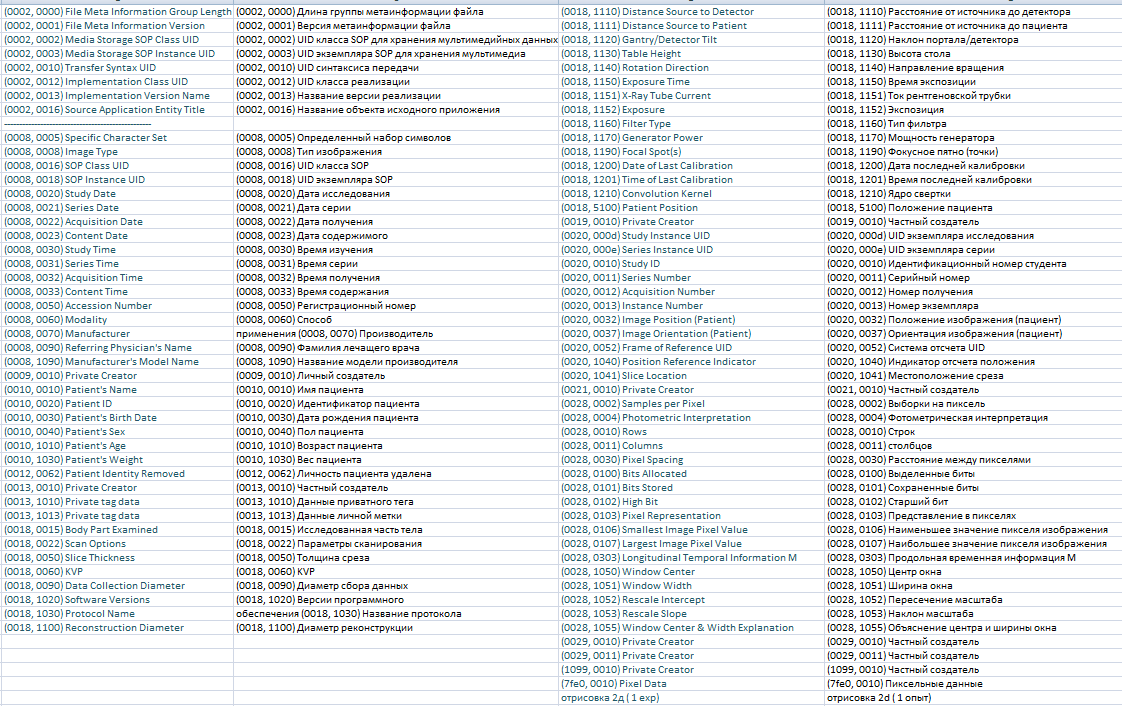

###### проверка размерностей


In [ ]:
# проверим размеры картинок
images_size = []

with zipfile.ZipFile(file_zip, 'r') as zip_file:
    for item in list(dict_pictures.values()):
        dcm_file = pydicom.dcmread(zip_file.open(item), force=True)
        images_size.append(f'{dcm_file.Rows} x {dcm_file.Columns}')

set(images_size)

{'512 x 512'}

In [ ]:
# проверим кол-во срезов по папкам
count_pictures_dcm = pd.DataFrame(dict_pictures.keys())
count_pictures_dcm[['name_pictures','slice']] = count_pictures_dcm[0].str.split('_',1, expand=True)
count_pictures_dcm['slice'] = count_pictures_dcm['slice'].astype(int)

max_count_pictures = pd.DataFrame(count_pictures_dcm.groupby('name_pictures')['slice'].max())
min_count_pictures = pd.DataFrame(count_pictures_dcm.groupby('name_pictures')['slice'].min())
print('\nкол-во пациентов:',count_pictures_dcm['name_pictures'].nunique())
print('max кол-во срезов в dcm:', max_count_pictures['slice'].max())
print('min кол-во срезов в dcm:', max_count_pictures['slice'].min())

<ipython-input-25-040abf361697>:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  count_pictures_dcm[['name_pictures','slice']] = count_pictures_dcm[0].str.split('_',1, expand=True)



кол-во пациентов: 402
max кол-во срезов в dcm: 297
min кол-во срезов в dcm: 75


In [ ]:
# сохраним файл на диск чтобы потом сравнить с масками
max_count_pictures.to_csv('/content/drive/MyDrive/Colab Notebooks/СТАЖИРОВКА1/count_slice_dcm.csv')


###### отрисовка 2д ( 1 ex)

In [ ]:
# выберем папку пациента
example  = "LUNG1-001"

In [ ]:
# Отрисуем все картинки из папки выбранного пациента, 

example_path = [item for item in dict_pictures.values() if example in item] #получим все пути с картинками выбранного пацинта

with zipfile.ZipFile(file_zip, 'r') as zip_file:
    for item in example_path:
        dcm_file = pydicom.dcmread(zip_file.open(item), force=True)
        images = dcm_file.pixel_array
        print('File name: ', item)
        print('Image size: ', dcm_file.Rows, 'x', dcm_file.Columns)
        plt.figure(figsize=(10, 10))
        plt.imshow(images, cmap=plt.cm.bone) #cm.gray
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

###### save 2d

In [6]:
# выберем папки пациентов с масками
example  = [
    # 'LUNG1-001', 'LUNG1-002', 'LUNG1-005', 'LUNG1-008', 'LUNG1-013',
    #    'LUNG1-016', 'LUNG1-018', 'LUNG1-024', 'LUNG1-026', 'LUNG1-028',
    #    'LUNG1-035', 'LUNG1-038', 'LUNG1-042', 'LUNG1-046', 'LUNG1-050',
    #    'LUNG1-051', 'LUNG1-053', 'LUNG1-060', 'LUNG1-065', 'LUNG1-068',
    #    'LUNG1-088', 'LUNG1-091', 'LUNG1-093', 'LUNG1-097', 'LUNG1-104',
    #    'LUNG1-107', 'LUNG1-113', 'LUNG1-115', 'LUNG1-117', 'LUNG1-128',
    #    'LUNG1-133', 'LUNG1-143', 'LUNG1-148', 'LUNG1-149', 'LUNG1-156',
    #    'LUNG1-168', 'LUNG1-170', 'LUNG1-177', 'LUNG1-186', 'LUNG1-195',
#        'LUNG1-196', 'LUNG1-205', 'LUNG1-229', 'LUNG1-242', 'LUNG1-249',
#        'LUNG1-252', 'LUNG1-253', 'LUNG1-277', 'LUNG1-285', 'LUNG1-286',
#        'LUNG1-291', 'LUNG1-296', 'LUNG1-299', 'LUNG1-301', 'LUNG1-303',
#        'LUNG1-307', 'LUNG1-312', 'LUNG1-314', 'LUNG1-320', 'LUNG1-325',
#        'LUNG1-331', 'LUNG1-336', 'LUNG1-340', 'LUNG1-343', 'LUNG1-348',
#        'LUNG1-361', 'LUNG1-362', 'LUNG1-366', 'LUNG1-367', 'LUNG1-376',
#        'LUNG1-377', 'LUNG1-381', 'LUNG1-387', 'LUNG1-396', 'LUNG1-416',
#        'LUNG1-418', 'LUNG1-420',
#        ]

# выберем папки пациентов без масок    
       
       'LUNG1-004', 'LUNG1-006', 'LUNG1-007', 'LUNG1-009', 'LUNG1-010',
       'LUNG1-011', 'LUNG1-012', 'LUNG1-015', 'LUNG1-017', 'LUNG1-019',
       'LUNG1-020', 'LUNG1-022', 'LUNG1-023', 'LUNG1-025', 'LUNG1-027',
       'LUNG1-029', 'LUNG1-030', 'LUNG1-032', 'LUNG1-033', 'LUNG1-034',
       'LUNG1-036', 'LUNG1-037', 'LUNG1-039', 'LUNG1-040', 'LUNG1-041',
       'LUNG1-043', 'LUNG1-044', 'LUNG1-045', 'LUNG1-047', 'LUNG1-048',
       'LUNG1-049', 'LUNG1-052', 'LUNG1-054', 'LUNG1-055', 'LUNG1-056',
       'LUNG1-057', 'LUNG1-059', 'LUNG1-062', 'LUNG1-063', 'LUNG1-064',
      #  'LUNG1-066', 'LUNG1-067', 'LUNG1-070', 'LUNG1-071', 'LUNG1-072',
      #  'LUNG1-073', 'LUNG1-075', 'LUNG1-076', 'LUNG1-077', 'LUNG1-078',
      #  'LUNG1-079', 'LUNG1-080', 'LUNG1-081', 'LUNG1-082', 'LUNG1-084',
      #  'LUNG1-086', 'LUNG1-087', 'LUNG1-089', 'LUNG1-090', 'LUNG1-092',
      #  'LUNG1-094', 'LUNG1-096', 'LUNG1-098', 'LUNG1-099', 'LUNG1-100',
      #  'LUNG1-101', 'LUNG1-102', 'LUNG1-103', 'LUNG1-105', 'LUNG1-106',
      #  'LUNG1-108', 'LUNG1-109',
       ]

In [ ]:
# Отрисуем все картинки из папки выбранного пациента, записшем в словарь
from skimage.transform import resize
dcm_images_data = {}

# Отрисуем все картинки из папки выбранного пациента, 

example_path = [ dict_pictures[key] for key in dict_pictures.keys() for item in example if item in key] #получим все пути с картинками выбранного пацинта

with zipfile.ZipFile(file_zip, 'r') as zip_file:
    for item in example_path:
        dcm_image = pydicom.dcmread(zip_file.open(item), force=True)
        print(item)
        # Получение массива пикселей изображения
        image_array = dcm_image.pixel_array

        # Нормализация значений пикселей к диапазону от 0 до 1
        # image_array = image_array / np.max(image_array)

        # Изменение размера изображения до требуемого размера (например, 256x256)
        # image_array = resize(image_array, (256, 256), anti_aliasing=True)

        # Добавление размерности к массиву пикселей для соответствия входному формату нейронной сети
        # image_array = np.expand_dims(image_array, axis=-1)
        # print(image_array.shape)

        # Подготовка изображения для входа в нейронную сеть
        # image_array = image_array.astype(np.float32)

        dcm_images_data[ f"{dcm_image.PatientID}_{dcm_image.InstanceNumber}"] = image_array

#         # plt.figure(figsize=(10, 10))
#         # plt.imshow(prepared_image, cmap=plt.cm.bone) #cm.gray
#         # plt.show()

Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-004/09-24-2006-StudyID-NA-27873/0.000000-NA-20785/1-001.dcm
Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-004/09-24-2006-StudyID-NA-27873/0.000000-NA-20785/1-002.dcm
Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-004/09-24-2006-StudyID-NA-27873/0.000000-NA-20785/1-003.dcm
Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-004/09-24-2006-StudyID-NA-27873/0.000000-NA-20785/1-004.dcm
Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-004/09-24-2006-StudyID-NA-27873/0.000000-NA-20785/1-005.dcm
Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-004/09-24-2006-StudyID-NA-27873/0.000000-NA-20785/1-006.dcm
Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-004/09-24-2006-StudyID-NA-27873/0.000000-NA-20785/1-007.dcm
Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-004/09-24-2006-StudyID-NA-27873/0.000000-NA-20785/1-008.dcm
Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-004/09-24-2006-StudyID-NA-27873/0.000000-NA

In [ ]:
 pd.DataFrame([dcm_images_data]).T

In [ ]:
#  pd.DataFrame([dcm_images_data]).T.to_csv('/content/drive/MyDrive/Colab Notebooks/СТАЖИРОВКА1/dcm_images_data_2d_all_mask.csv')
#  pd.DataFrame([dcm_images_data]).T.to_csv('/content/drive/MyDrive/Colab Notebooks/СТАЖИРОВКА1/dcm_images_data_2d_all_no_mask.csv')

In [ ]:
import pickle

# по LUNG1-195'

with open('/content/drive/MyDrive/Colab Notebooks/СТАЖИРОВКА1/dcm_images_data_2d_all_mask_256_2.pickle', 'wb') as outfile:
    pickle.dump( dcm_images_data, outfile)


###### отрисовка 3д ( 1 ex)
- исходники кода : https://russianblogs.com/article/22763178929/
- значения по шкале hu : https://translated.turbopages.org/proxy_u/en-ru.ru.811475d4-6468e048-bfbeb161-74722d776562/https/en.wikipedia.org/wiki/Hounsfield_scale

In [ ]:
# выберем папку пациента

example  = "LUNG1-001"
example_path = [item for item in dict_pictures.values() if example in item] #получим все пути с картинками выбранного пацинта


In [ ]:
# 2. Сканируйте каталог пациента, загрузите все срезы, сортируйте срез в направлении переключения Z и получите толщину нарезки

def load_scan(example_path):

  with zipfile.ZipFile(file_zip, 'r') as zip_file:

      slices = [pydicom.read_file(zip_file.open(s)) for s in example_path]
      slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
      try:
          slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
      except:
          slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
  
      for s in slices:
          s.SliceThickness = slice_thickness
  
      return slices

In [ ]:
# 3. По умолчанию значение, полученное из файла DICOM, является единицей HU. Вам нужно решить эту проблему.

# Некоторые сканеры имеют цилиндрические границы сканирования, но выходное изображение является квадратным. 
# Пиксели, которые выходят за пределы этих границ, получают фиксированное значение 20000.
# Первый шаг - установить эти значения на 0, что в настоящее время соответствует воздуху. 
# Затем вернитесь к устройству HU и умножьте с выдвижным наклоном и добавьте перехват (легко хранится в отсканированных метаданных!).

def get_pixels_hu(slices):
    image = np.stack([s.pixel_array for s in slices])
    # Преобразован в int16, int16 в порядке, потому что все значения должны быть <32K
    image = image.astype(np.int16)
 
    # Установите элемент за пределами границы на 0
    image[image == -2000] = 0
 
    # Преобразован в блок HU
    for slice_number in range(len(slices)):
 
        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope
 
        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)
 
        image[slice_number] += np.int16(intercept)
 
    return np.array(image, dtype=np.int16)


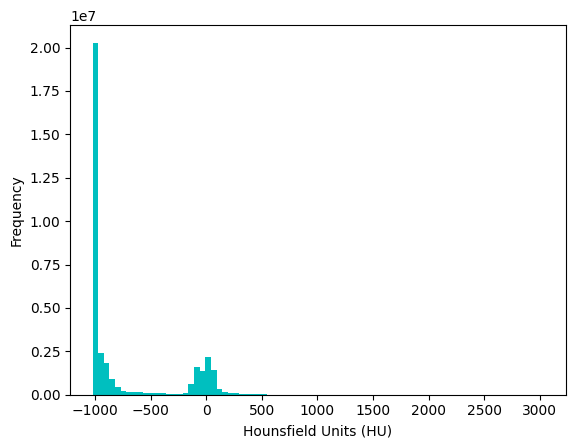

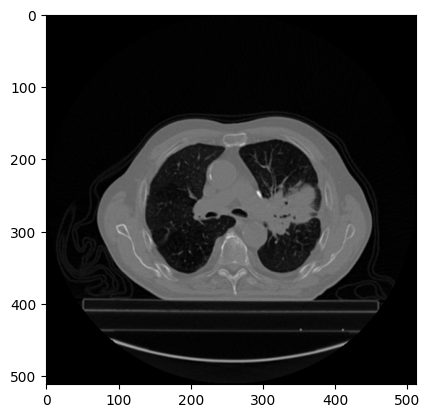

In [ ]:
# 4. Посмотреть изображение пациента:

first_patient = load_scan(example_path)
first_patient_pixels = get_pixels_hu(first_patient)
plt.hist(first_patient_pixels.flatten(), bins=80, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()
 
# Показать кусочек средней позиции
plt.imshow(first_patient_pixels[80], cmap=plt.cm.gray)
plt.show()

In [ ]:
# 5. Re -Sampling
# Возможное расстояние между пикселями КТ составляет [2,5, 0,5, 0,5], что означает, что расстояние между срезами составляет 2,5 мм. 
# Для различных сканирований расстояние среза может быть различным, а автоматический анализ является проблемой.
# Обычно используемый метод состоит в том, чтобы попробовать все данные, установленные в срезы того же разрешения.
# Например, интервал всех срезов до [1 1] миллиметра отбирается.
# Таким образом, вы можете использовать трехмерную сетку, не беспокоясь о неопределенности толщины нарезания.

import scipy.ndimage

def resample(image, scan, new_spacing=[1,1,1]):
    # Determine current pixel spacing
    spacing = np.array([scan[0].SliceThickness] + list(scan[0].PixelSpacing), dtype=np.float32)
 
    resize_factor = spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = spacing / real_resize_factor
 
    image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')
 
    return image, new_spacing
 
pix_resampled, spacing = resample(first_patient_pixels, first_patient, [1,1,1])
print("Shape before resampling\t", first_patient_pixels.shape)
print("Shape after resampling\t", pix_resampled.shape)

<ipython-input-33-422f28b6076e>:20: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')


Shape before resampling	 (134, 512, 512)
Shape after resampling	 (402, 500, 500)


In [ ]:
# 6. Нарисуйте 3D -изображение
# Отображение сканирования трехмерных изображений, и интуитивное ощущение данных полезно для обработки данных.
# К сожалению, кубик использования создает аналогичную сетку для нашего 3D -объекта и нарисуйте его с помощью matplotlib.

from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_3d(image, threshold=-300):
 
    # Расположите сканер вертикально,
    # таким образом, голова пациента была бы вверху, обращена к камере
    p = image.transpose(2,1,0)
 
    mesh = measure.marching_cubes(p, threshold)
    mesh_verts, mesh_faces, _, _ = mesh
 
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
 
    mesh_collection = Poly3DCollection(mesh_verts[mesh_faces], alpha=1.0)
    face_color = [0, 0, 1]
    mesh_collection.set_facecolor(face_color)
    ax.add_collection3d(mesh_collection)
 
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
 
    plt.show()

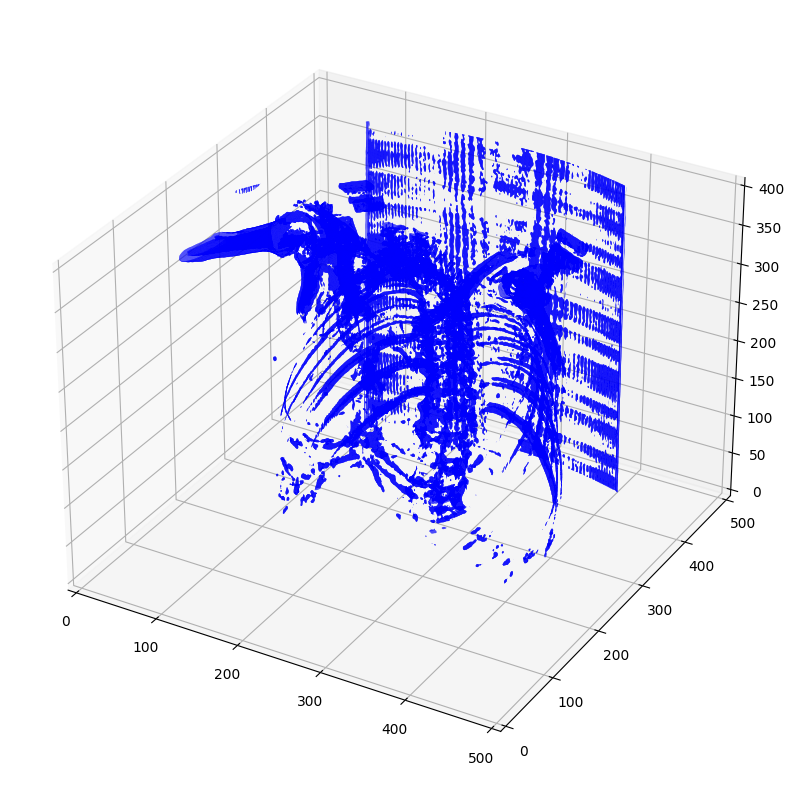

In [ ]:
plot_3d(pix_resampled, 400) #отобразим кости

In [ ]:
# plot_3d(pix_resampled, 15) #отобразим Плевральный выпот - Транссудат

In [ ]:
# plot_3d(pix_resampled, 33) #отобразим Плевральный выпот - Экссудат

In [ ]:
# plot_3d(pix_resampled, -600) #отобразим легкое

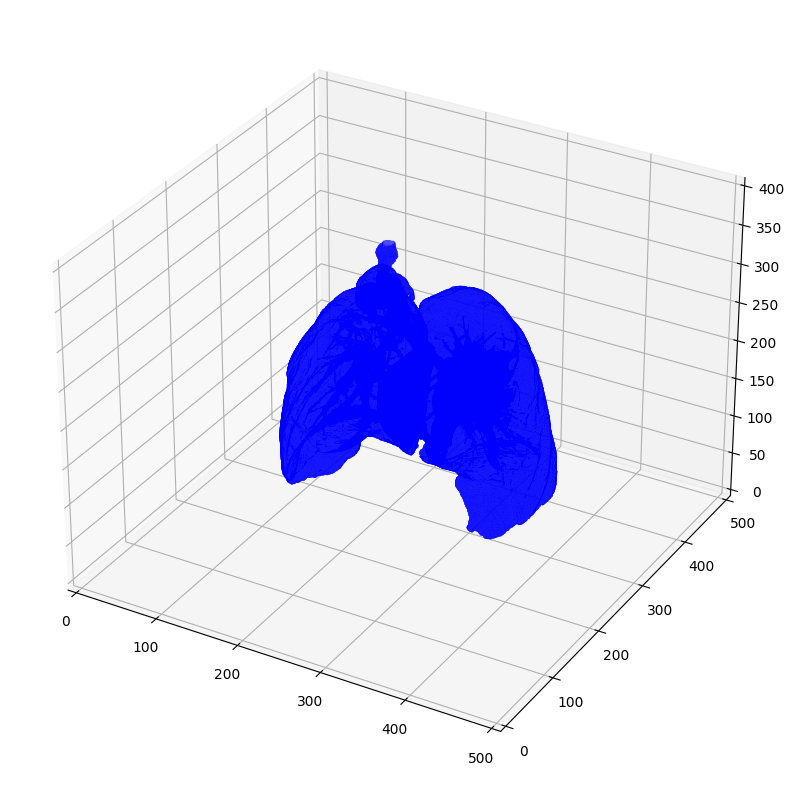

In [ ]:
def largest_label_volume(im, bg=-1):
    vals, counts = np.unique(im, return_counts=True)
 
    counts = counts[vals != bg]
    vals = vals[vals != bg]
 
    if len(counts) > 0:
        return vals[np.argmax(counts)]
    else:
        return None
 
def segment_lung_mask(image, fill_lung_structures=True):
 
    # not actually binary, but 1 and 2. 
    # 0 is treated as background, which we do not want
    binary_image = np.array(image > -320, dtype=np.int8)+1
    labels = measure.label(binary_image)
 
    # Pick the pixel in the very corner to determine which label is air.
    #   Improvement: Pick multiple background labels from around the patient
    #   More resistant to "trays" on which the patient lays cutting the air 
    #   around the person in half
    background_label = labels[0,0,0]
 
    #Fill the air around the person
    binary_image[background_label == labels] = 2
 
 
    # Method of filling the lung structures (that is superior to something like 
    # morphological closing)
    if fill_lung_structures:
        # For every slice we determine the largest solid structure
        for i, axial_slice in enumerate(binary_image):
            axial_slice = axial_slice - 1
            labeling = measure.label(axial_slice)
            l_max = largest_label_volume(labeling, bg=0)
 
            if l_max is not None: #This slice contains some lung
                binary_image[i][labeling != l_max] = 1
 
 
    binary_image -= 1 #Make the image actual binary
    binary_image = 1-binary_image # Invert it, lungs are now 1
 
    # Remove other air pockets insided body
    labels = measure.label(binary_image, background=0)
    l_max = largest_label_volume(labels, bg=0)
    if l_max is not None: # There are air pockets
        binary_image[labels != l_max] = 0
 
    return binary_image
 
segmented_lungs = segment_lung_mask(pix_resampled, False)
segmented_lungs_fill = segment_lung_mask(pix_resampled, True)
 
plot_3d(segmented_lungs, 0)

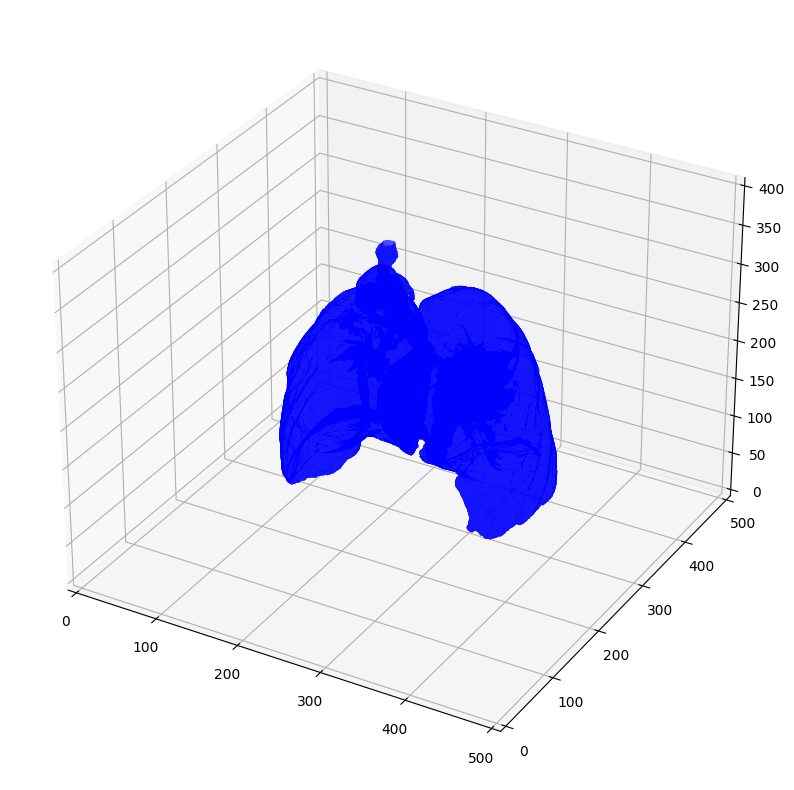

In [ ]:
plot_3d(segmented_lungs_fill, 0)